The learning outcomes of this session are

-   to have an introductory understanding of Singular Value
    Decomposition (SVD).

-   Understanding the use of condition numbers.

-   To use SVD to perform least squares.

Set up
======


1.  Import NumPy as before with

In [ ]:
    import numpy as np

Singular Value Decomposition (SVD)
==================================

Refer to the lecture notes (topic 4) on SVD. Specifically any matrix
$\mathbf{A}$ can be written as
$$\mathbf{A} \;\; = \;\; \mathbf{U} \,  \mathbf{D}   \, 
\mathbf{V}^{\intercal} \;\; ,$$ where $$\begin{aligned}
\mathbf{A} \;\; &\in& \;\; \mathbb{R} \;\; ,\\
\mathbf{U} \;\; &-& \;\; M \times M \;\; , \\
\mathbf{V} \;\; &-& \;\; N \times N \;\; , \\
\mathbf{U}, \; \mathbf{V} \;\; &-& \;\; \text{orthogonal} \;\; , \\
D_{ij} \;\; &=& \;\; 
\left\{ 
\begin{matrix}
d_i \, \ge \, 0 \;\; \text{iff} \;\; i=j \\
0 \;\; \text{otherwise}  
\end{matrix}
\right.  \;\; .\end{aligned}$$ SVD can be performed in NumPy using
numpy.linalg.svd.

-   Type the following

In [ ]:
    A = np.array([ [ 400.0, -201.0] , [-800.0,401.0] ])

In [ ]:
    U,D,Vt = np.linalg.svd(A)

In [ ]:
    print("U=",U)

In [ ]:
    print("D=",D)

In [ ]:
    print("Vt=",Vt)

-   **What are the dimensions of U , D and Vt?**

-   Repeat the above for the following matrices. In each case, note the
    dimensions of U , D and Vt.

    $$\begin{pmatrix}
    1.0 & 2.0 & 3.0 \\
    -1.0 & 3.0 & 2.0 
    \end{pmatrix}$$ $$\begin{pmatrix}
    1.0 & 2.0 & 3.0 & 4.0 \\
    -1.0 & 3.0 & 2.0 & 3.0 
    \end{pmatrix}$$ $$\begin{pmatrix}
    1.0 & 2.0 \\
    -1.0 & 3.0 \\
    3.0 & 1.0 
    \end{pmatrix}$$

    $$\begin{pmatrix}
    1.0 & 2.0 \\
    -1.0 & 3.0 \\
    3.0 & 1.0 \\
    4.0 & 2.0 
    \end{pmatrix}$$

Condition numbers
=================

The condition number of a matrix is the ratio of the largest to smallest
diagonal entries of $\mathbf{D}$ in its singular value decomposition. It
gives us an indication of how close the matrix is to being singular
(non-invertible). A matrix may be formally invertible but numerically
(for a specific precision) it cannot be computed reliably. A very large
condition number means it is close to being singular.

One can compute the condition number of a matrix using the NumPy command
numpy.linalg.cond, though you can also compute it directly if you have D
computed directly.

-   Consider the two matrices we examined in lab 3.

In [ ]:
    A = np.array([[400.0, -201.0],[-800.0,401.0]])

In [ ]:
    B = np.array([ [401.0, -201.0], [-800.0,401.0] ] )

    Compute the condition number of A with

In [ ]:
    print(np.linalg.cond(A))

-   **Compute the condition number of B using the same command. How do
    they compare?**

-   Perform an SVD on A using

In [ ]:
    U,D,Vt = np.linalg.svd(A)

-   Type the following

In [ ]:
    print(D[0]/D[1])

    **How does this compare with the condition number of A? Why do you think that
    happened?**

-   Now consider a new matrix

In [ ]:
    A = np.array([[ 1.0, 2.0, 3.0 ], [3.0,-4.0,5.0], [1.0,-8.0,-1.0] ])

In [ ]:
    U, D, Vt = np.linalg.svd(A)

In [ ]:
    print("D=",D)

In [ ]:
    print("Condition number of D =",np.linalg.cond(A))

-   Check to see if the matrix can be inverted.

In [ ]:
    print("Inverse of A = ", np.linalg.inv(A))

In [ ]:
    print("Ainv A =", np.linalg.inv(A).dot(A))

-   **What happened with Ainv A?**

Inverting with SVD
==================

If a matrix $\mathbf{A}$ is invertible then we can write the inverse
using SVD. So writing $\mathbf{A}$ as
$$\mathbf{A} \;\; = \;\; \mathbf{U} \, \mathbf{D} \, \mathbf{V}^{\intercal} \;\;,$$
then
$$\mathbf{A}^{-1} \;\; = \;\; \mathbf{V} \, \mathbf{D}^{-1} \, \mathbf{U}^{\intercal} \;\; .$$
where $\mathbf{D}^{-1}$ is a diagonal matrix where the diagonal entries
are the inverse of the diagonal entries of $\mathbf{D}$.

**Compute the inverse of the matrix $$\begin{pmatrix}
400.0& -201.0 \\
-800.0&401.0 
\end{pmatrix}$$ first using numpy.linalg.inv and then using the above
approach.**

Least squares
=============

There are many cases where you will need to get a ‘best fit’ of the data
that you have. Consider the scatter plot we considered in Topic 2

<figure>
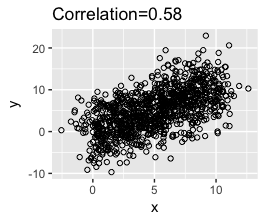<figcaption>image</figcaption>
</figure>

Clearly there is some relationship between the y-values and the
x-values. Least squares attempts to find a line (of the form
$y= mx + c$) that best represents this data. We will discuss this in the
lectures but Python has a function which can carry this out
(numpy.linalg.lstsq). From school you will probably know how to find
this equation if you are given two points but not necessarily for an
arbitrary number of points.

As discussed in the documentation for numpy.linalg.lstsq

in two dimensions we can think of this problem as solving a set of
linear equations.

If $\underline{x}$ is a vector of all the observed x-values and
$\underline{y}$ the corresponding vector of y-values then we are trying
to solve the following matrix equation
$$\underline{y} \;\; = \;\; \mathbf{A} \, \underline{p} \;\;,$$

where $$\mathbf{A} = 
 \begin{pmatrix}
\underline{y} & 
\begin{matrix}
1 \\
\vdots \\
1
\end{matrix}
\end{pmatrix}$$ and $$\underline{p} = 
 \begin{pmatrix}
m \\
c
\end{pmatrix}$$

*Hint - think about this when you have just two points.*

If you have more than two points then there are more equations than
unknowns and you can’t solve this (remember - for the above scatter plot
then is no way to draw a straight line that goes through every point).

But - least squares can give the best fit. We can test this with the
following python code (please note - if you are running python on your
laptop you may need to install matplotlib.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0, 1, 2, 3])

In [ ]:
y = np.array([-1, 0.2, 0.9, 2.1])

In [ ]:
A = np.vstack([x, np.ones(len(x))]).T

In [ ]:
m, c = np.linalg.lstsq(A, y)[0]

In [ ]:
print(m, c)

In [ ]:
plt.plot(x, y, 'o', label='Original data', markersize=10)

In [ ]:
plt.plot(x, m*x + c, 'r', label='Fitted line')

In [ ]:
plt.legend()

In [ ]:
plt.show()

(Have a look at the NumPy documentation on vstack).

**What happens?**

SVD and Least Squares
---------------------

It turns out that least squares can be done with SVD.

In particular, using SVD one can compute something called the
*pseudo*-inverse of a matrix (for a matrix $\mathbf{A}$ we label its
pseudo-inverse $\mathbf{A}^+$). You can compute the pseudo-inverse of
any matrix.

Hence we can come up with a best estimate of $\underline{p}$ by
computing

$$\underline{p} \;\; = \;\; \mathbf{A}^+ \, \underline{y} \;\;.$$

We can implement this in Python as we can compute the pseudo-inverse
using numpy.linalg.pinv.

In [ ]:
Ap = np.linalg.pinv(A)

In [ ]:
m,c = Ap.dot(y)

In [ ]:
print(m, c)

In [ ]:
plt.plot(x, y, 'o', label='Original data', markersize=10)

In [ ]:
plt.plot(x, m*x + c, 'r', label='Fitted line')

In [ ]:
plt.legend()

In [ ]:
plt.show()

How does this value of $m$ and $c$ compare with the previous values
using the explicit least squares function?